## 打破复杂度

这道题的本质也是小北问答。

### Flag 1

从[这里](https://blog.csdn.net/yfzcsc/article/details/77623365)找一个卡SPFA的生成器就可以解决：

```cpp
#include<bits/stdc++.h>
using namespace std;
struct edge{int u,v,w;};
vector<edge>v;
int id[5000][5000],n=3,tp,m=2000/n,a[1000000];
int r(){
	return rand();
	//return rand()<<13|rand();
}
int main(){
	freopen("spfa_luogu.txt","w",stdout);
	srand(time(0));
	for(int i=1;i<=n;++i)
		for(int j=1;j<=m;++j)
			id[i][j]=++tp,a[tp]=tp;
	int SIZE = 29998;
	for(int i=1;i<=n;++i)
		for(int j=1;j<=m;++j){
			if(i<n){
				v.push_back(edge{id[i][j],id[i+1][j],1});
				v.push_back(edge{id[i+1][j],id[i][j],1});
				if(j<m){
					if(1)v.push_back(edge{id[i][j],id[i+1][j+1],r()%SIZE+10});
					else v.push_back(edge{id[i+1][j+1],id[i][j],r()%SIZE+10});
				}
			}
			if(j<m){
				v.push_back(edge{id[i][j],id[i][j+1],r()%SIZE+10});
				v.push_back(edge{id[i][j+1],id[i][j],r()%SIZE+10});
			}
		}
	fprintf(stderr,"[%d,%d,%d]",v.size(),n,m);
	random_shuffle(v.begin(),v.end());
//	printf("%d %d %d\n",tp,v.size(),2);
	printf("%d %d\n",tp,v.size());
	for(int i=0;i<v.size();++i)printf("%d %d %d\n",a[v[i].u],a[v[i].v],v[i].w);
//	for(int i=1;i<=10;++i)printf("%d ",a[id[1][10*i]]);
//	printf("%d %d",a[1],a[2]);
}
```


### Flag 2

能否做出Flag 2的关键在于有无看过[这篇](https://blog.csdn.net/yfzcsc/article/details/77623365) 知乎回答。看明白之后，就可以根据示意图构造：

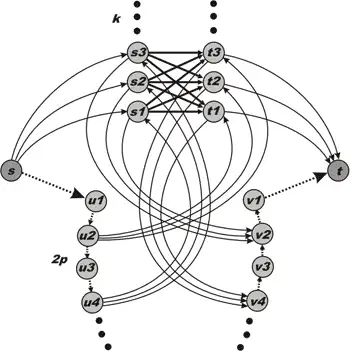

In [40]:

import random

# 我们先造一个完全二部图

k = 40

p = 9

def _inf():
    return 500000

# 两边各有k个节点（K_{k,k}的左边和右边）
left_nodes = list(range(3, 3 + k))   # 左侧 K_{k,k} 的节点
right_nodes = list(range(3 + k, 3 + 2 * k))  # 右侧 K_{k,k} 的节点

# 初始化边集合
edges = []

# 中间的完全二部图 K_{k,k} 的边，每条容量为1
for u in left_nodes:
    for v in right_nodes:
        edges.append((u, v, 1))
        
 # s 和 t 节点分别连到左侧和右侧节点
for u in left_nodes:
    edges.append((1, u, k))  # 从源点到左侧每个节点，权重为k
for v in right_nodes:
    edges.append((v, 2, k))   # 从右侧每个节点到汇点，权重为k
        
        
start = 3 + 2 * k - 1

# 连上起始节点和node, INF
edges.append((1, start+1, _inf()))

for i in range(1, p+1):
    node = start + i
    # 连上上一个节点 (i != 1), INF
    if i > 1:
        edges.append((node - 1, node, _inf()))
    if i % 4 == 2:
        # 连上所有右侧节点, k
        for v in right_nodes: 
            edges.append((node, v, k))
    if i % 4 == 0:
        # 连上所有左侧节点, k
        for v in left_nodes: 
            edges.append((node, v, k)) 
    
for i in range(1, p+1):
    node = start + 2 * p + 1 - i
    # 连上上一个节点 (, INF
    edges.append((node - 1, node, _inf()))
    if i % 4 == 2:
        # 连上所有左侧节点
        for v in left_nodes: 
            edges.append((v, node, k)) 
    if i % 4 == 0:
        # 连上所有右侧节点
        for v in right_nodes: 
            edges.append((v, node, k)) 
            
# 连上start + 2*p 和终止节点
edges.append((start + 2*p, 2, _inf()))

edges


[(3, 43, 1),
 (3, 44, 1),
 (3, 45, 1),
 (3, 46, 1),
 (3, 47, 1),
 (3, 48, 1),
 (3, 49, 1),
 (3, 50, 1),
 (3, 51, 1),
 (3, 52, 1),
 (3, 53, 1),
 (3, 54, 1),
 (3, 55, 1),
 (3, 56, 1),
 (3, 57, 1),
 (3, 58, 1),
 (3, 59, 1),
 (3, 60, 1),
 (3, 61, 1),
 (3, 62, 1),
 (3, 63, 1),
 (3, 64, 1),
 (3, 65, 1),
 (3, 66, 1),
 (3, 67, 1),
 (3, 68, 1),
 (3, 69, 1),
 (3, 70, 1),
 (3, 71, 1),
 (3, 72, 1),
 (3, 73, 1),
 (3, 74, 1),
 (3, 75, 1),
 (3, 76, 1),
 (3, 77, 1),
 (3, 78, 1),
 (3, 79, 1),
 (3, 80, 1),
 (3, 81, 1),
 (3, 82, 1),
 (4, 43, 1),
 (4, 44, 1),
 (4, 45, 1),
 (4, 46, 1),
 (4, 47, 1),
 (4, 48, 1),
 (4, 49, 1),
 (4, 50, 1),
 (4, 51, 1),
 (4, 52, 1),
 (4, 53, 1),
 (4, 54, 1),
 (4, 55, 1),
 (4, 56, 1),
 (4, 57, 1),
 (4, 58, 1),
 (4, 59, 1),
 (4, 60, 1),
 (4, 61, 1),
 (4, 62, 1),
 (4, 63, 1),
 (4, 64, 1),
 (4, 65, 1),
 (4, 66, 1),
 (4, 67, 1),
 (4, 68, 1),
 (4, 69, 1),
 (4, 70, 1),
 (4, 71, 1),
 (4, 72, 1),
 (4, 73, 1),
 (4, 74, 1),
 (4, 75, 1),
 (4, 76, 1),
 (4, 77, 1),
 (4, 78, 1),
 (4, 79, 1),

In [41]:
print(2+2*p+2*k, len(edges), 1, 2)
for u, v, w in edges:
    print(u, v, w)

100 2019 1 2
3 43 1
3 44 1
3 45 1
3 46 1
3 47 1
3 48 1
3 49 1
3 50 1
3 51 1
3 52 1
3 53 1
3 54 1
3 55 1
3 56 1
3 57 1
3 58 1
3 59 1
3 60 1
3 61 1
3 62 1
3 63 1
3 64 1
3 65 1
3 66 1
3 67 1
3 68 1
3 69 1
3 70 1
3 71 1
3 72 1
3 73 1
3 74 1
3 75 1
3 76 1
3 77 1
3 78 1
3 79 1
3 80 1
3 81 1
3 82 1
4 43 1
4 44 1
4 45 1
4 46 1
4 47 1
4 48 1
4 49 1
4 50 1
4 51 1
4 52 1
4 53 1
4 54 1
4 55 1
4 56 1
4 57 1
4 58 1
4 59 1
4 60 1
4 61 1
4 62 1
4 63 1
4 64 1
4 65 1
4 66 1
4 67 1
4 68 1
4 69 1
4 70 1
4 71 1
4 72 1
4 73 1
4 74 1
4 75 1
4 76 1
4 77 1
4 78 1
4 79 1
4 80 1
4 81 1
4 82 1
5 43 1
5 44 1
5 45 1
5 46 1
5 47 1
5 48 1
5 49 1
5 50 1
5 51 1
5 52 1
5 53 1
5 54 1
5 55 1
5 56 1
5 57 1
5 58 1
5 59 1
5 60 1
5 61 1
5 62 1
5 63 1
5 64 1
5 65 1
5 66 1
5 67 1
5 68 1
5 69 1
5 70 1
5 71 1
5 72 1
5 73 1
5 74 1
5 75 1
5 76 1
5 77 1
5 78 1
5 79 1
5 80 1
5 81 1
5 82 1
6 43 1
6 44 1
6 45 1
6 46 1
6 47 1
6 48 1
6 49 1
6 50 1
6 51 1
6 52 1
6 53 1
6 54 1
6 55 1
6 56 1
6 57 1
6 58 1
6 59 1
6 60 1
6 61 1
6 62 1
6 63 1


In [32]:

# 我们先造一个完全二部图

n = 96 # 总节点数
k = n // 6
p = n // 6 - 1

print(n, p, k)
# k = 38
# p = 7

# 两边各有k个节点（K_{k,k}的左边和右边）
left_nodes = list(range(3, 3 + k))   # 左侧 K_{k,k} 的节点
right_nodes = list(range(3 + k, 3 + 2 * k))  # 右侧 K_{k,k} 的节点

# 初始化边集合
edges = []

# 无穷/非常大的容量
INF_CAPACITY = 5000000

# 中间的完全二部图 K_{k,k} 的边，每条容量为1
for u in left_nodes:
    for v in right_nodes:
        edges.append((u, v, 1))
        
 # s 和 t 节点分别连到左侧和右侧节点
for u in left_nodes:
    edges.append((1, u, k))  # 从源点到左侧每个节点，权重为k
for v in right_nodes:
    edges.append((v, 2, k))   # 从右侧每个节点到汇点，权重为k
        
        
start = 3 + 2 * k - 1

# 连上起始节点和node, INF
edges.append((1, start+1, INF_CAPACITY))

# 创建左侧辅助节点
for v in left_nodes:
    edges.append((v, start+ 4 * p, 1))
    
# 创建右侧辅助节点
for v in right_nodes:
    edges.append((start + 4*p+1, v, 1))
              
for i in range(1, 2 * p + 1):
    node = start + i
    # 连上上一个节点 (i != 1), INF
    if i > 1:
        edges.append((node - 1, node, INF_CAPACITY))
    if i % 4 == 0:
        # 连上右侧辅助节点
        edges.append((node, start + 4 * p + 1, k ** 2))
        # for v in right_nodes: 
        #    edges.append((node, v, k))
    
for i in range(1, 2 * p + 1):
    node = start + 4 * p + 1 - i
    # 连上上一个节点 (, INF
    edges.append((node - 1, node, INF_CAPACITY))
    if i % 4 == 0:
        # 连上左侧辅助节点
        # for v in left_nodes: 
        #     edges.append((node, v, k)) 
        edges.append((start + 4*p, node, k ** 2))
            
# 连上start + 2*p 和终止节点
edges.append((start + 4 * p, 2, INF_CAPACITY))

edges


96 15 16


[(3, 19, 1),
 (3, 20, 1),
 (3, 21, 1),
 (3, 22, 1),
 (3, 23, 1),
 (3, 24, 1),
 (3, 25, 1),
 (3, 26, 1),
 (3, 27, 1),
 (3, 28, 1),
 (3, 29, 1),
 (3, 30, 1),
 (3, 31, 1),
 (3, 32, 1),
 (3, 33, 1),
 (3, 34, 1),
 (4, 19, 1),
 (4, 20, 1),
 (4, 21, 1),
 (4, 22, 1),
 (4, 23, 1),
 (4, 24, 1),
 (4, 25, 1),
 (4, 26, 1),
 (4, 27, 1),
 (4, 28, 1),
 (4, 29, 1),
 (4, 30, 1),
 (4, 31, 1),
 (4, 32, 1),
 (4, 33, 1),
 (4, 34, 1),
 (5, 19, 1),
 (5, 20, 1),
 (5, 21, 1),
 (5, 22, 1),
 (5, 23, 1),
 (5, 24, 1),
 (5, 25, 1),
 (5, 26, 1),
 (5, 27, 1),
 (5, 28, 1),
 (5, 29, 1),
 (5, 30, 1),
 (5, 31, 1),
 (5, 32, 1),
 (5, 33, 1),
 (5, 34, 1),
 (6, 19, 1),
 (6, 20, 1),
 (6, 21, 1),
 (6, 22, 1),
 (6, 23, 1),
 (6, 24, 1),
 (6, 25, 1),
 (6, 26, 1),
 (6, 27, 1),
 (6, 28, 1),
 (6, 29, 1),
 (6, 30, 1),
 (6, 31, 1),
 (6, 32, 1),
 (6, 33, 1),
 (6, 34, 1),
 (7, 19, 1),
 (7, 20, 1),
 (7, 21, 1),
 (7, 22, 1),
 (7, 23, 1),
 (7, 24, 1),
 (7, 25, 1),
 (7, 26, 1),
 (7, 27, 1),
 (7, 28, 1),
 (7, 29, 1),
 (7, 30, 1),
 (7, 31, 1),

In [33]:
# f = open("zadeh.txt", "w")

print(4+4*p+2*k, len(edges), 1, 2)
for u, v, w in edges:
    print(u, v, w)
    

96 395 1 2
3 19 1
3 20 1
3 21 1
3 22 1
3 23 1
3 24 1
3 25 1
3 26 1
3 27 1
3 28 1
3 29 1
3 30 1
3 31 1
3 32 1
3 33 1
3 34 1
4 19 1
4 20 1
4 21 1
4 22 1
4 23 1
4 24 1
4 25 1
4 26 1
4 27 1
4 28 1
4 29 1
4 30 1
4 31 1
4 32 1
4 33 1
4 34 1
5 19 1
5 20 1
5 21 1
5 22 1
5 23 1
5 24 1
5 25 1
5 26 1
5 27 1
5 28 1
5 29 1
5 30 1
5 31 1
5 32 1
5 33 1
5 34 1
6 19 1
6 20 1
6 21 1
6 22 1
6 23 1
6 24 1
6 25 1
6 26 1
6 27 1
6 28 1
6 29 1
6 30 1
6 31 1
6 32 1
6 33 1
6 34 1
7 19 1
7 20 1
7 21 1
7 22 1
7 23 1
7 24 1
7 25 1
7 26 1
7 27 1
7 28 1
7 29 1
7 30 1
7 31 1
7 32 1
7 33 1
7 34 1
8 19 1
8 20 1
8 21 1
8 22 1
8 23 1
8 24 1
8 25 1
8 26 1
8 27 1
8 28 1
8 29 1
8 30 1
8 31 1
8 32 1
8 33 1
8 34 1
9 19 1
9 20 1
9 21 1
9 22 1
9 23 1
9 24 1
9 25 1
9 26 1
9 27 1
9 28 1
9 29 1
9 30 1
9 31 1
9 32 1
9 33 1
9 34 1
10 19 1
10 20 1
10 21 1
10 22 1
10 23 1
10 24 1
10 25 1
10 26 1
10 27 1
10 28 1
10 29 1
10 30 1
10 31 1
10 32 1
10 33 1
10 34 1
11 19 1
11 20 1
11 21 1
11 22 1
11 23 1
11 24 1
11 25 1
11 26 1
11 27 1
11 28